In [4]:
import os
import sys
import json
import bilby
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import utils
%load_ext autoreload
%autoreload 2

In [5]:
from utils.corner2d_new import CornerZ12, CornerZSpectral, get_lines_for_legend

def plot_z12(
        post, inj, 
        z1_range=None, z2_range=None,
        ppe_grid_indices=[], ppe_grid_angles=[], 
        ppe_result_indices=[], ppe_result_cis=[],
        ppe_annotation_indices=[], ppe_annotation_anchors=0.,
        fig=None):
    cp = CornerZ12(fig, grid_indices=ppe_grid_indices, grid_angles=ppe_grid_angles)
    cp.plot(post['z_1'].values, post['z_2'].values, 
            x_range=z1_range, y_range=z2_range, color='C0')
    cp.mark(inj['z_1'], inj['z_2'], color='black',
            marker='^', linestyle='', markersize=3.*plt.rcParams['lines.markersize'])
    cp.add_ppe_results(
            ppe_result_indices, ppe_result_cis, color='C1',
            linewidth=1.5*plt.rcParams['lines.linewidth'], zorder=2)
    cp.rescale_axes()
#     cp.mark(0., 0., color='black', 
#             marker=None, linestyle='dashdot')
    cp.add_shade(color='lightgray', zorder=2)
    cp.add_ppe_grid(color='gray', zorder=1)
    cp.add_ppe_annotations(
            ppe_annotation_indices, ppe_annotation_anchors,
            fontsize=plt.rcParams['legend.fontsize'])
    return cp


def plot_zspectral(
        post, inj, 
        za_range=None, zb_range=None,
        ppe_grid_indices=[], ppe_grid_angles=[], 
        ppe_result_indices=[], ppe_result_cis=[],
        ppe_annotation_indices=[], ppe_annotation_anchors=0.,
        fig=None):
    cp = CornerZSpectral(fig, grid_indices=ppe_grid_indices, grid_angles=ppe_grid_angles)
    cp.plot(post['z_ang'].values, post['z_bilat'].values, 
            x_range=za_range, y_range=zb_range, color='C0')
    cp.mark(inj['z_ang'], inj['z_bilat'], color='black',
            marker='^', linestyle='', markersize=3.*plt.rcParams['lines.markersize'])
    cp.add_ppe_results(
            ppe_result_indices, ppe_result_cis, color='C1',
            linewidth=1.5*plt.rcParams['lines.linewidth'], zorder=2)
    cp.rescale_axes()
#     cp.mark(y=0., color='black', 
#             marker=None, linestyle='dashdot')
    cp.add_ppe_grid(color='gray', zorder=1)
    cp.add_ppe_annotations(
            ppe_annotation_indices, ppe_annotation_anchors,
            fontsize=plt.rcParams['legend.fontsize'])
    cp.axes[2].axhline(0., color='gray', linestyle='dotted')
    cp.axes[3].axhline(0., color='gray', linestyle='dotted')
    return cp

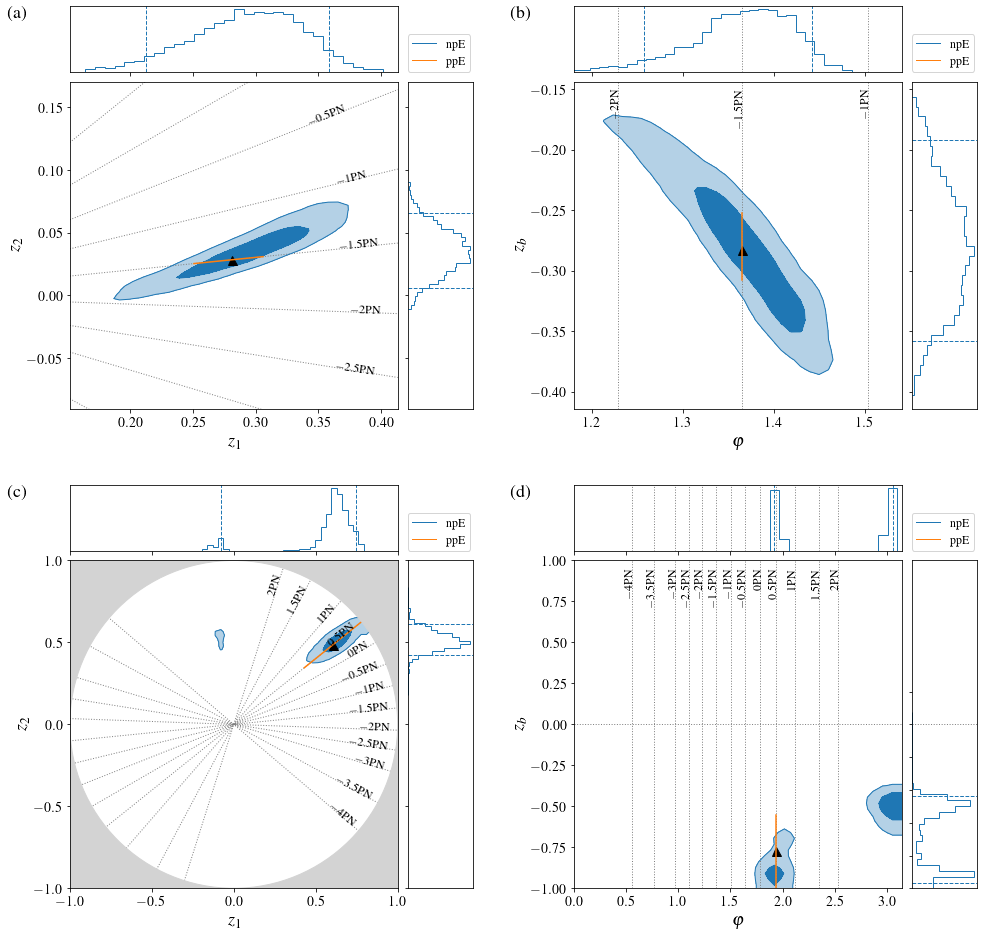

In [7]:
plt.style.use('publication.mplstyle')
fig = plt.figure(figsize=(
        utils.TEXT_WIDTH_PRD_DOUBLE*2,
        utils.TEXT_WIDTH_PRD_DOUBLE*2))
subfigs = fig.subfigures(2, 2)

theory_angles = pd.read_csv("../data/theory_angles.csv", index_col=0)
root_posteriors = "../data/bilby_results/posteriors/"
root_injections = "../data/bilby_results/injections/"

labels = ['npE', 'ppE']
lines = get_lines_for_legend(colors=['C0', 'C1'])

run_name = "mtot35_bn8_0p25"
post_ppe = pd.read_csv(os.path.join(root_posteriors, run_name+"_ppe.csv"), index_col=0)
with open(os.path.join(root_injections, run_name+"_ppe.json"), 'r') as f:
    inj = bilby.utils.io.recursively_decode_bilby_json(json.load(f))

post = pd.read_csv(os.path.join(root_posteriors, run_name+"_z12.csv"), index_col=0)
cp = plot_z12(
        post, inj, z1_range=0.995, z2_range=0.995,
        ppe_grid_indices=theory_angles['b'].values, ppe_grid_angles=theory_angles['z_theta'].values,
        ppe_result_indices=[-8], ppe_result_cis=[np.quantile(post_ppe['z_bilat'], [0.05,0.95])],
        ppe_annotation_indices=[-10,-9,-8,-7,-6], ppe_annotation_anchors=-0.4,
        fig=subfigs[0,0])
# cp.axes[2].legend(lines, labels, loc='upper left')
cp.axes[1].legend(lines, labels, loc=(0,0))
post = pd.read_csv(os.path.join(root_posteriors, run_name+"_zpolar.csv"), index_col=0)
cp = plot_zspectral(
        post, inj, za_range=0.995, zb_range=0.995,
        ppe_grid_indices=theory_angles['b'].values, ppe_grid_angles=theory_angles['z_ang'].values,
        ppe_result_indices=[-8], ppe_result_cis=[np.quantile(post_ppe['z_bilat'], [0.05,0.95])],
        ppe_annotation_indices=[-9,-8,-7], ppe_annotation_anchors=-0.15,
        fig=subfigs[0,1])
cp.set_xlim(1.18,1.54)
cp.align_axes()
# cp.axes[2].legend(lines, labels, loc='lower left')
cp.axes[1].legend(lines, labels, loc=(0,0))


run_name = "mtot35_bn4_1p0"
post_ppe = pd.read_csv(os.path.join(root_posteriors, run_name+"_ppe.csv"), index_col=0)
with open(os.path.join(root_injections, run_name+"_ppe.json"), 'r') as f:
    inj = bilby.utils.io.recursively_decode_bilby_json(json.load(f))

post = pd.read_csv(os.path.join(root_posteriors, run_name+"_z12.csv"), index_col=0)
cp = plot_z12(
        post, inj, 
        ppe_grid_indices=theory_angles['b'].values, ppe_grid_angles=theory_angles['z_theta'].values,
        ppe_result_indices=[-4], ppe_result_cis=[np.quantile(post_ppe['z_bilat'], [0.05,0.95])],
        ppe_annotation_indices=None, ppe_annotation_anchors=-0.95,
        fig=subfigs[1,0])
cp.set_xlim(-1., 1.)
cp.set_ylim(-1., 1.)
cp.set_xticks(cp.axes[2].get_xticks())
cp.set_yticks(cp.axes[2].get_xticks())
# cp.axes[2].legend(lines, labels, loc='upper left')
cp.axes[1].legend(lines, labels, loc=(0,0))
post = pd.read_csv(os.path.join(root_posteriors, run_name+"_zpolar.csv"), index_col=0)
cp = plot_zspectral(
        post, inj,
        ppe_grid_indices=theory_angles['b'].values, ppe_grid_angles=theory_angles['z_ang'].values,
        ppe_result_indices=[-4], ppe_result_cis=[np.quantile(post_ppe['z_bilat'], [0.05,0.95])],
        ppe_annotation_indices=None, ppe_annotation_anchors=0.95,
        fig=subfigs[1,1])
cp.set_xlim(0., np.pi)
cp.set_ylim(-1., 1.)
# cp.axes[2].legend(lines, labels, loc='lower left')
cp.axes[1].legend(lines, labels, loc=(0,0))


subfigs[0, 0].subplots_adjust(left=0.15, right=0.95, bottom=0.1, top=0.9)
subfigs[0, 1].subplots_adjust(left=0.15, right=0.95, bottom=0.1, top=0.9)
subfigs[1, 0].subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
subfigs[1, 1].subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)

axes_to_label = [sf.axes[0] for sf in subfigs.flat]
axes_label_pos = [(-0.13,1.)] * len(axes_to_label)
for i,(ax,pos) in enumerate(zip(axes_to_label, axes_label_pos)):
    axlabel = f'({chr(97+i)})'
    ax.text(pos[0], pos[1], axlabel, 
            transform=ax.transAxes, 
            fontweight='bold', fontsize=18,
            va='top', ha='right')
    
# fig.savefig('../figs/deviation_examples_untrained.pdf')